## Importing Libraries

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

## Loading the Dataset

In [70]:
#Dataset is being loaded
spam_dataset = pd.read_csv("spambase.csv")

# Adding the names for the column
spam_dataset.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'target_value']

# For visibility purpose, first 5 rows are being displayed
spam_dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target_value
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [71]:
#Finding the shape of the dataset
spam_dataset.shape

(4600, 58)

**This means that there are 4600 data tuples/rows and 58 data columns in this dataset**

## Data Cleaning

In [72]:
# Removing duplicate data rows from the dataset
spam_dataset = spam_dataset.drop_duplicates()
spam_dataset.shape

(4209, 58)

**This means that there were duplicate data rows in the dataset as it got decreased to 4209 rows from 4600 rows**

In [73]:
# Getting missing data values in the columns per column
missing_data_vals = spam_dataset.isnull().sum()
missing_data_vals

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**From the above output, we can see that there are no missing values available in the dataset**

## Spam Dataset Visualization

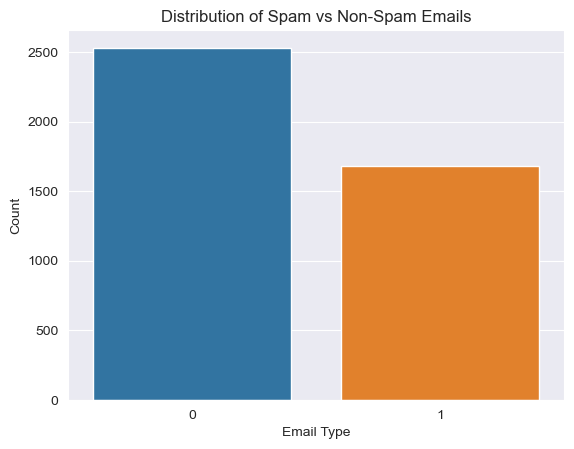

In [74]:
sns.countplot(x='target_value', data=spam_dataset)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

**The above bar graph shows the distribution of spam and non-spam emails in the dataset. 0 indicates non-spam while 1 indicates spam**

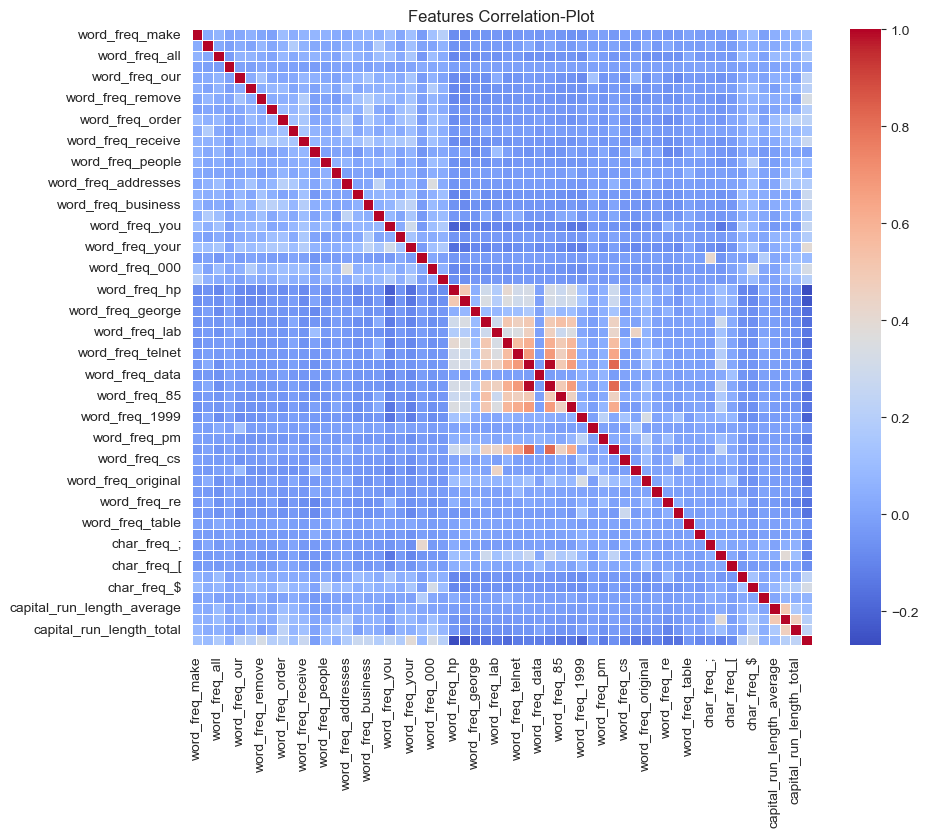

In [75]:
# Compute the correlation matrix
corr = spam_dataset.corr()

# Create a heatmap of the correlation matrix
f, ax = plt.subplots(figsize=[10,8])
plt.title('Features Correlation-Plot')
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

**The above graph describes the feature correlation between each and every feature though a heatmap**

In [76]:
# Creating a dataset with all the training data except the target value column
X = spam_dataset.drop(columns=['target_value'])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [77]:
# Getting and separating the target values
Y = spam_dataset['target_value'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Standardizing of the Dataset

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

**We guarantee that each feature has a comparable range and variance by scaling them, which makes it easier for the algorithm to recognize the deeper data patterns.**

## Scaled Dataset Splitting

In [79]:
# Split dataset into training (70%) and testing (30%) - using the scaled data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size = 0.7, random_state = 0)


## Applying PCA to the scaled dataset

In [80]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4209, 49)

**This means that the features/columns have been decreased to 49**

In [81]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399, 0.01329598, 0.01301827, 0.01274202, 0.01232527,
       0.01195466, 0.0117737 , 0.01120298, 0.01098196, 0.01036702,
       0.01030622, 0.00936144, 0.00876401, 0.00816524])

**This array indicates  the variance proportion of the 49 principal components in descending order**

In [82]:
pca.explained_variance_ratio_.sum()

0.9566723905184702

**This code has returned the sum of the explained variance proportion ratios of the principal components, and it indicates that around 95% variance of the original data is included and captured**

In [83]:
pca.n_components_

49

**Indicates the number of features now available in the dataset to model training and testing**

## Using the Scaled DataSet

## Decision Tree

In [84]:
#Create decision tree classification model
decision_t_classification = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train the model using the training sets
decision_t_classification.fit(X_train,Y_train)

#Getting the training data accuracy score
print('Training accuracy: ',decision_t_classification.score(X_train,Y_train))

#Getting the testing data accuracy score
print('Testing accuracy: ',decision_t_classification.score(X_test,Y_test))

Training accuracy:  1.0
Testing accuracy:  0.8978622327790974


## Dataset Evaluation - Train Dataset

In [85]:
# Predict the response for train dataset
train_prediction = decision_t_classification.predict(X_train)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction))

          Not-spam  Spam
Not-spam      1794     0
Spam             0  1152
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      1152

    accuracy                           1.00      2946
   macro avg       1.00      1.00      1.00      2946
weighted avg       1.00      1.00      1.00      2946



## Dataset Validation - Test Dataset

In [86]:
# Predict the response for test dataset
test_prediction = decision_t_classification.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction))

          Not-spam  Spam
Not-spam       677    60
Spam            69   457
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       737
           1       0.88      0.87      0.88       526

    accuracy                           0.90      1263
   macro avg       0.90      0.89      0.89      1263
weighted avg       0.90      0.90      0.90      1263



## Visualization of the Decision Tree for Scaled Data

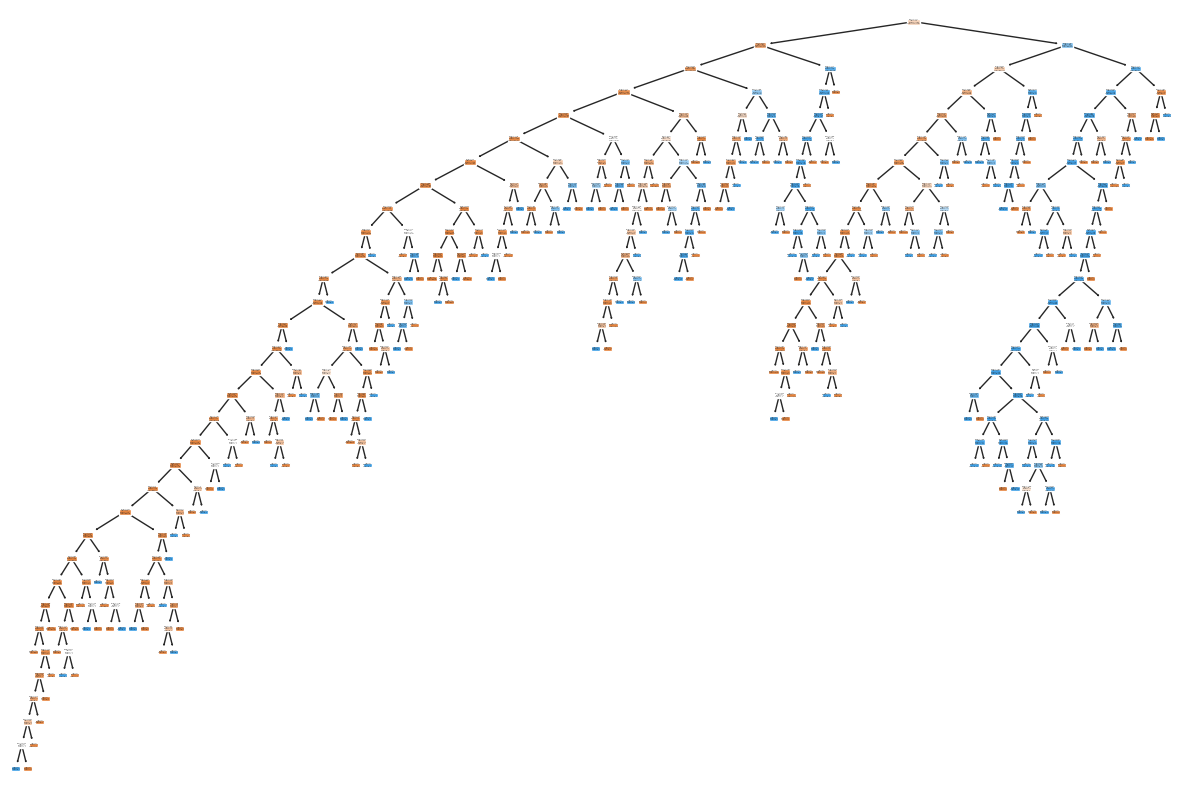

In [87]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_t_classification,filled=True)
plt.show()

**The decision tree is depicted in the plot, with each node indicating a choice or a leaf node representing a class label. The tree is divided depending on the feature values that best distinguish the classes.**

## Visualization of ROC Curve and Calculating AUC - For Scaled Data

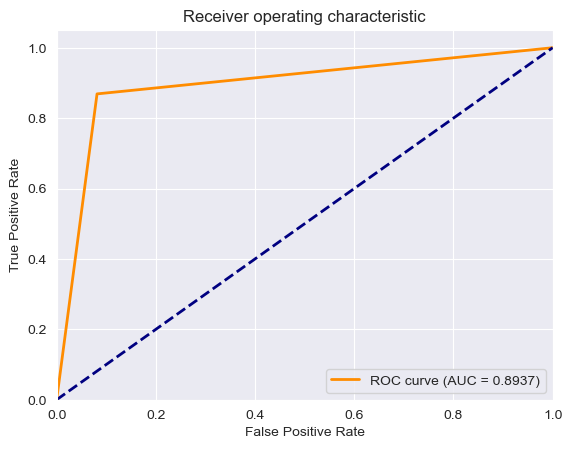

AUC: 0.8937


In [88]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, test_prediction)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.4f"% roc_auc)

In [89]:
# Split dataset into training (70%) and testing (30%) - using the PCA scaled data
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, train_size = 0.7, random_state = 0)

## After Applying PCA - Scaled Dataset for the Decision Tree Model

In [90]:
# Train the model using the training sets
decision_t_classification.fit(X_train_pca,Y_train )

#Getting the training data accuracy score for the PCA implemented data
print('Training accuracy: ',decision_t_classification.score(X_train_pca, Y_train))

#Getting the test data accuracy score for the PCA implemented data
print('Testing accuracy: ',decision_t_classification.score(X_test_pca, Y_test))

Training accuracy:  1.0
Testing accuracy:  0.8756927949326999


## Dataset Evaluation - Train Data

In [91]:
# Predict the response for train dataset
train_prediction_pca = decision_t_classification.predict(X_train_pca)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction_pca)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction_pca))

          Not-spam  Spam
Not-spam      1794     0
Spam             0  1152
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      1152

    accuracy                           1.00      2946
   macro avg       1.00      1.00      1.00      2946
weighted avg       1.00      1.00      1.00      2946



## Dataset Validation - Test Data

In [92]:
# Predict the response for test dataset
test_prediction_pca = decision_t_classification.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction_pca)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction_pca))

          Not-spam  Spam
Not-spam       659    78
Spam            79   447
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       737
           1       0.85      0.85      0.85       526

    accuracy                           0.88      1263
   macro avg       0.87      0.87      0.87      1263
weighted avg       0.88      0.88      0.88      1263



## Visualization of the Decision Tree for PCA Applied Scaled Data

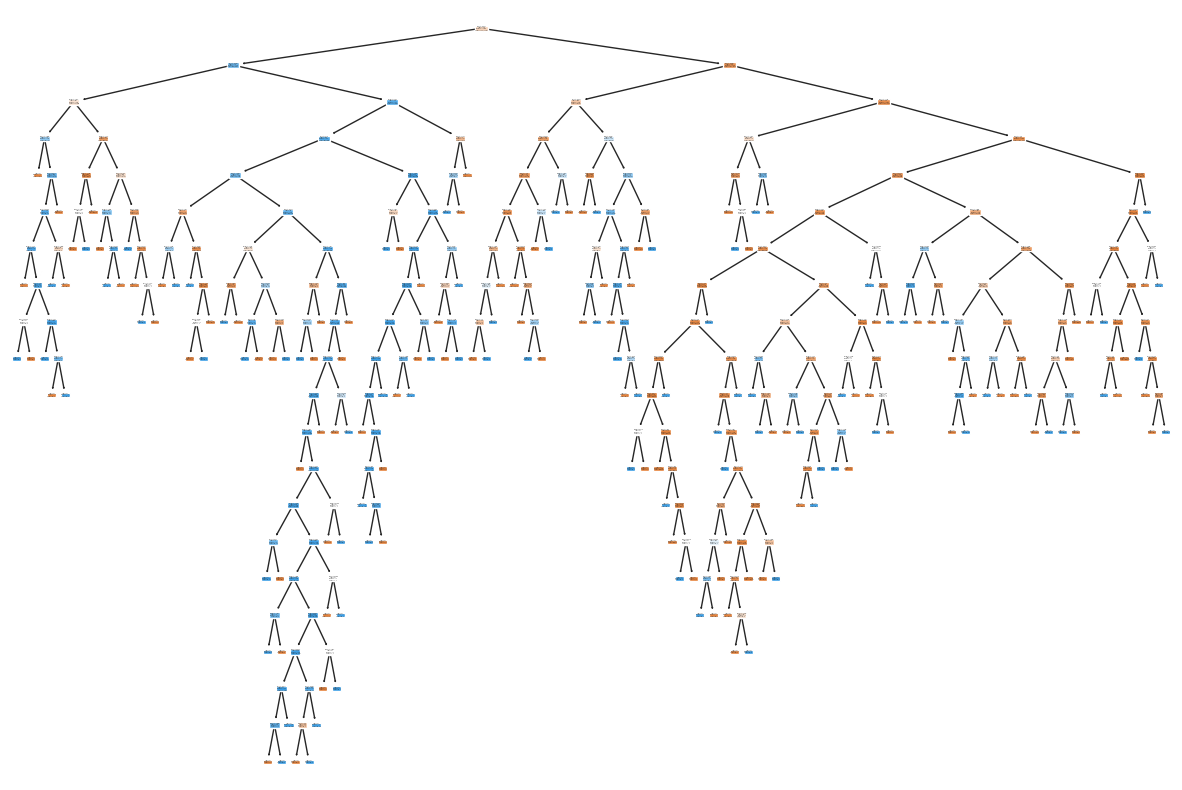

In [93]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_t_classification,filled=True)
plt.show()

## Visualization of ROC Curve and Calculating AUC - For PCA applied Scaled Data

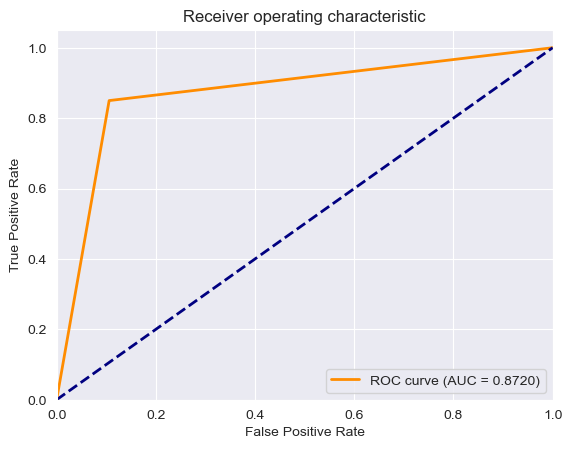

AUC: 0.8720


In [94]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, test_prediction_pca)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.4f"% roc_auc)

## Pruning of Decision Tree

### Cost-complexity Pruning

In [95]:
path = decision_t_classification.cost_complexity_pruning_path(X_train_pca, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00031823 0.00032468 0.00033027 0.00033146 0.00033265
 0.0003371  0.0003378  0.00033794 0.00033887 0.00033944 0.00033944
 0.00033944 0.00033944 0.00033944 0.0004043  0.00041321 0.00044169
 0.00045259 0.00050448 0.00050916 0.00050916 0.00051725 0.00053542
 0.0005819  0.00059403 0.00059526 0.00061717 0.00062231 0.00062231
 0.00063422 0.00063646 0.00063895 0.00064494 0.00065464 0.00065611
 0.00065892 0.00066148 0.00066377 0.00066516 0.00066556 0.0006859
 0.00078567 0.00081466 0.00083687 0.0008855  0.00090518 0.00090518
 0.00090891 0.00091314 0.0009553  0.00096984 0.00101833 0.00105605
 0.0010575  0.00106076 0.00106894 0.00107613 0.00110885 0.00111836
 0.00113148 0.00117978 0.00118805 0.00118805 0.00119039 0.00130928
 0.00133543 0.00135777 0.00136909 0.00138799 0.00149355 0.0015908
 0.00161941 0.00162933 0.00166629 0.00175265 0.00175666 0.00178362
 0.00181401 0.00182322 0.00187853 0.00208752 0.00211209 0.002182
 0.00235137 0.00255199 0.00275818 0.00287265 0.00291395 0.00294171

**This shows the different vales of ccp_alpha at which the decision tree can be pruned and have an idea on how to obtain the cost-complexity pruning path**

In [96]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    decision_t_classification = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    decision_t_classification.fit(X_train_pca, Y_train)
    clfs.append(decision_t_classification)

display(clfs)

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00031822810590631366, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0003246849080551375, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033026916937303936, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033145641148516413, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033265444670739996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0003371023246014473, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0003378034901987795, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033794192908245954, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033887377720672596, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033944331296673454, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033944331296673454, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033944331296673454, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033944331296673454, rand

**By iterating through each ccp_alpha values that was found in the previous code snippet, a list of trained decision tree classifiers are being printed which can be used to compare each of their performances in each ccp_alpha value**

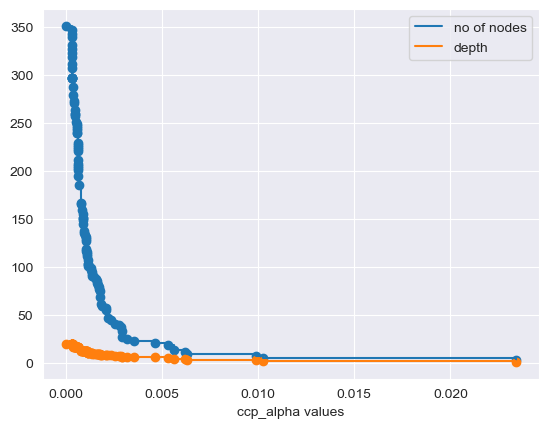

In [97]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.xlabel('ccp_alpha values')
plt.legend()
plt.show()

**This plot shows how the number of nodes and maximum depth of the decision tree classifiers change as the ccp_alpha value increases**

### Finding the best ccp_alpha value

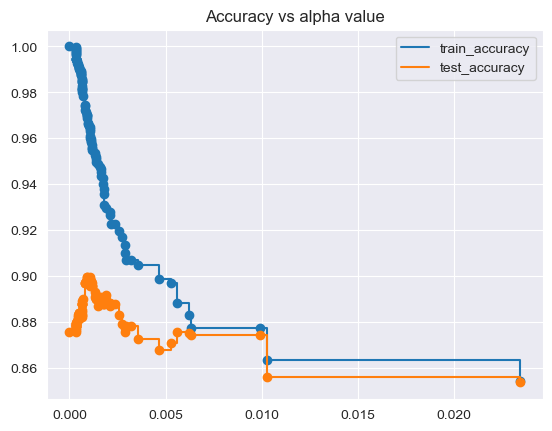

In [98]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_pca)
    y_test_pred = c.predict(X_test_pca)
    train_acc.append(accuracy_score(y_train_pred,Y_train))
    test_acc.append(accuracy_score(y_test_pred,Y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha value')
plt.show()

**this code is used to visualize the effect of cost-complexity pruning on the accuracy of the decision tree classifiers, and to help identify the optimal ccp_alpha value**
**According to the above graph, we can see that the best ccp_alpha value is around the value 0.008**

In [99]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.008)
clf.fit(X_train_pca,Y_train)

# Predict the response for train dataset
y_train_pred = clf.predict(X_train_pca)

# Predict the response for test dataset
y_test_pred = clf.predict(X_test_pca)

print(f'Train score: {accuracy_score(y_train_pred,Y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,Y_test)}')

Train score: 0.8774609640190089
Test score: 0.8741092636579573


## Dataset Evaluation -  Train Dataset

In [100]:
# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = y_train_pred)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = y_train_pred))


          Not-spam  Spam
Not-spam      1652   142
Spam           219   933
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1794
           1       0.87      0.81      0.84      1152

    accuracy                           0.88      2946
   macro avg       0.88      0.87      0.87      2946
weighted avg       0.88      0.88      0.88      2946



## Dataset Evaluation -  Test Dataset

In [101]:
# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = y_test_pred)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = y_test_pred))

          Not-spam  Spam
Not-spam       681    56
Spam           103   423
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       737
           1       0.88      0.80      0.84       526

    accuracy                           0.87      1263
   macro avg       0.88      0.86      0.87      1263
weighted avg       0.87      0.87      0.87      1263



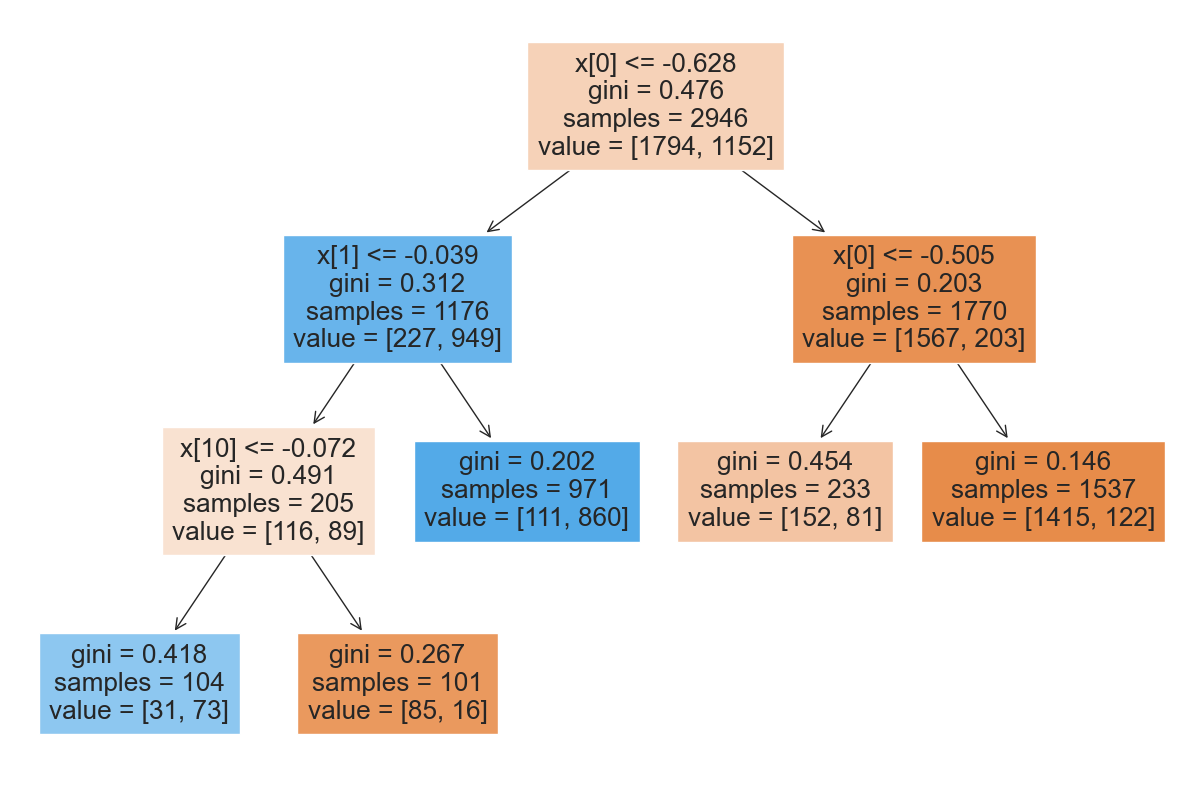

In [102]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

**Above graph shows the optimal decision tree after it's pruning**

## Visualization of ROC Curve and Calculating AUC - After Pruning the PCA Scaled Dataset

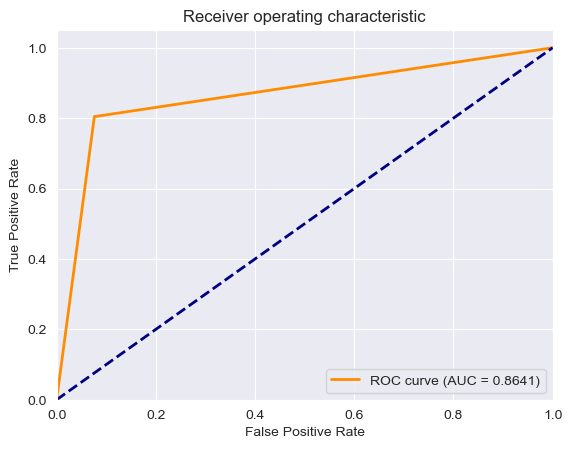

AUC: 0.8641


In [103]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.4f"% roc_auc)